<a href="https://colab.research.google.com/github/SimoneGiaco/NSGA2-NSGA3Comparison/blob/main/result/NSGA2vsNSGA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of NSGA2 and NSGA3 on various test problems

For each test problem we first perform a preliminary run to identify the correct termination criterion. Then we run the algorithm 10 times with different initial population and compute median, best and worst IGD scores when the Pareto front is available.
We also provide the hypervolume for the best solution. When the Pareto front is not available we just work in terms of the Hypervolume.

For each problem type we perform this analysis (when possible) for 2, 3 and 4 objectives to compare the performance of two algorithms as we vary the number of objectives.

## Dependencies and plotting function

In [12]:
#Required Libraries

import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.problems import get_problem
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
#from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.optimize import minimize
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Plotting function for the IGD score as a function of the generation using the optimization data (history)

def plot_igd(history: list, problem, n_gen: int)-> None:
  scores=[]
  for item in history:
      optimum=item.opt
      # Get reference directions for DTLZ3 problems with more than 3 objectives
      if problem.n_obj > 3:
          ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=6)
          pf = problem.pareto_front(ref_dirs)
      else:
          pf = problem.pareto_front()

      index= IGD(pf)
      scores.append(index(optimum.get('F')))

  plt.plot(np.arange(n_gen),scores)
  plt.title('Performance over generations')
  plt.xlabel('Generation')
  plt.ylabel('IGD_Score')
  plt.yscale("log")
  plt.show()

In [7]:
# Plotting function for the Hypervolume score as a function of the generation using the optimization data (history)

def plot_hv(history: list, problem, n_gen: int)-> None:
  scores=[]
  for item in hist:
      optimum=item.opt
      y=np.max(optimum.get('F'), axis=0)
      index=HV(ref_point=y)
      scores.append(index(optimum.get('F')))

  plt.plot(np.arange(n_gen),scores)
  plt.title('Performance over generations')
  plt.xlabel('Generation')
  plt.ylabel('HV_Score')
  plt.yscale("log")
  plt.show()

## Problem DTLZ2

### Two Objectives

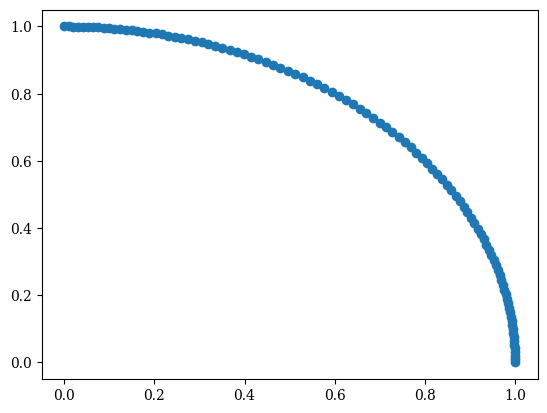

In [ ]:
problem_z2_obj2 = get_problem('dtlz2', n_var=11, n_obj=2)

p=problem_z2_obj2.pareto_front()
plt.scatter(p[:,0],p[:,1])
plt.show()

1.5637266635894775


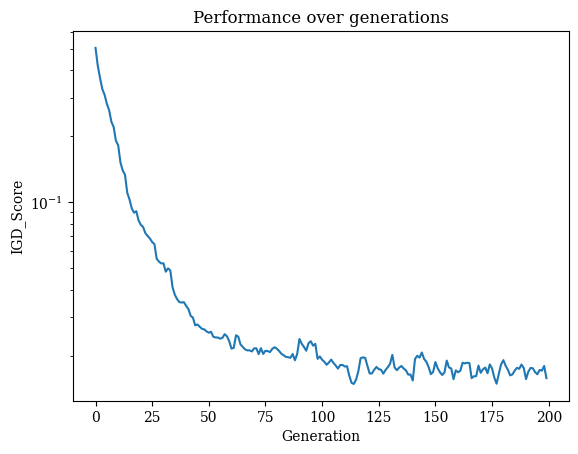

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(30,11)

algorithm = NSGA2(pop_size=30,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj2,
                  algorithm,
                  ('n_gen', 200),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj2,200)

3.0037050247192383


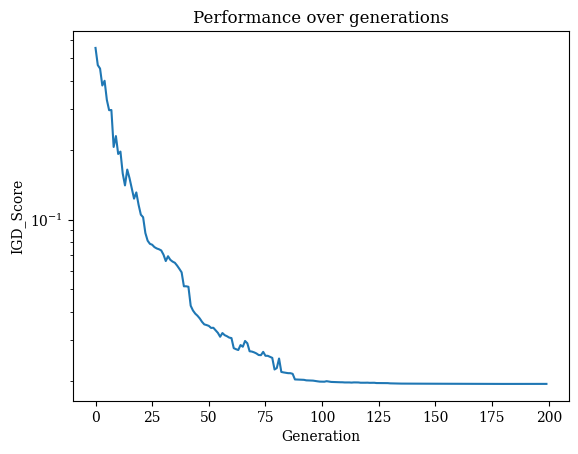

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(30,11)

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=20)
algorithm = NSGA3(pop_size=30,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj2,
                  algorithm,
                  ('n_gen', 200),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj2,200)

It seems that 200 generations is more than enough to achieve convergence. We will keep using this value for the maximum value of generations.

Median IGD: 0.01817
Max IGD: 0.01973
Min IGD: 0.01543
Hypervolume best solution: 0.1994
Hypervolume Pareto front: 0.21026


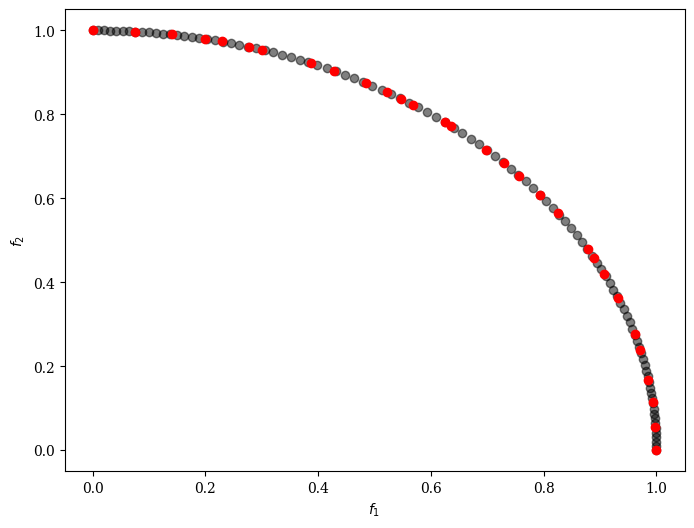

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(30,11)

    algorithm = NSGA2(pop_size=30,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj2,
                   algorithm,
                   ('n_gen', 200),
                   seed=1,
                   verbose=False)

    pf = problem_z2_obj2.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.01949
Max IGD: 0.01955
Min IGD: 0.01947
Hypervolume best solution: 0.19328
Hypervolume Pareto front: 0.21057


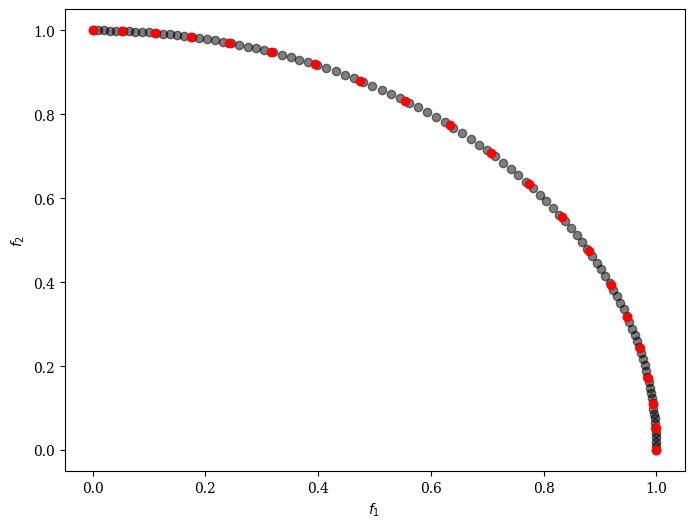

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(30,11)

    ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=20)
    algorithm = NSGA3(pop_size=30,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj2,
                   algorithm,
                   ('n_gen', 200),
                   seed=1,
                   verbose=False)

    pf = problem_z2_obj2.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Three Objectives

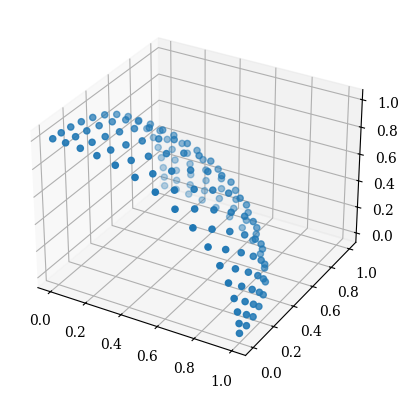

In [ ]:
problem_z2_obj3 = get_problem('dtlz2', n_var=12, n_obj=3)

p=problem_z2_obj3.pareto_front()

ax = plt.axes(projection='3d')
ax.scatter3D(p[:,0],p[:,1],p[:,2])
plt.show()

2.150264024734497


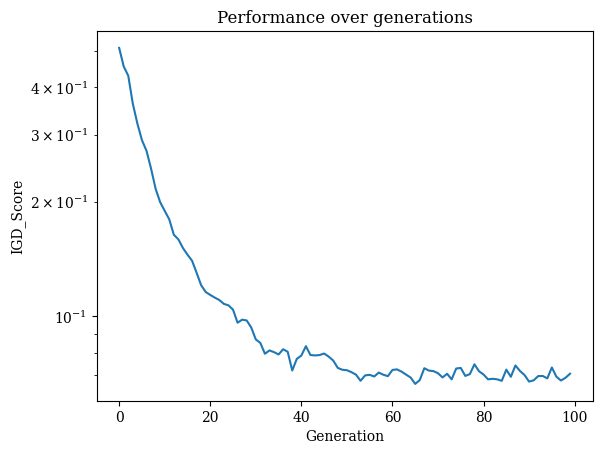

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,12)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj3,
                  algorithm,
                  ('n_gen', 100),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj3,100)

2.960867166519165


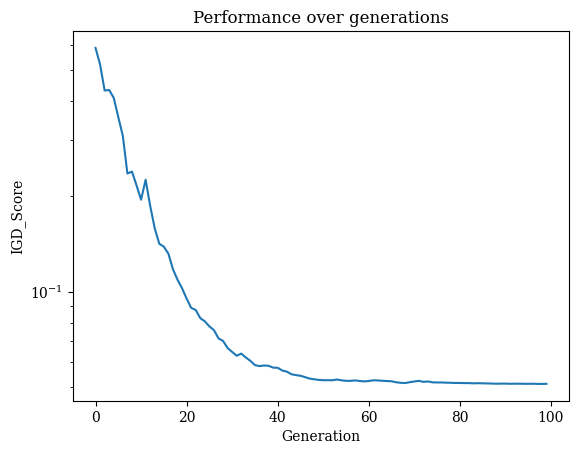

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,12)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj3,
                  algorithm,
                  ('n_gen', 100),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj3,100)

Convergence arises before 100 generations and therefore we will keep using this value.

Median IGD: 0.06999
Max IGD: 0.07403
Min IGD: 0.06817
Hypervolume best solution: 0.38703
Hypervolume Pareto front: 0.43179


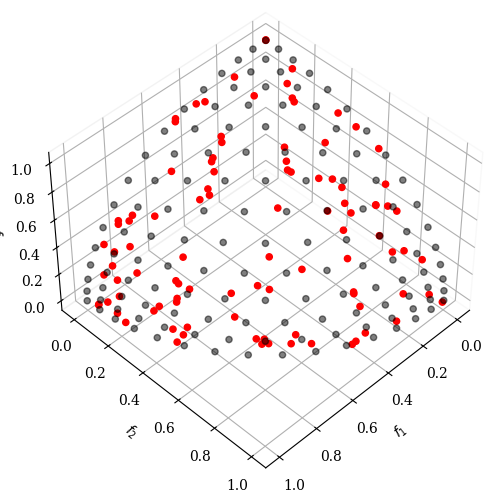

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj3,
                   algorithm,
                   ('n_gen', 100),
                   seed=1,
                   verbose=False)

    pf = problem_z2_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.05157
Max IGD: 0.05223
Min IGD: 0.05101
Hypervolume best solution: 0.41499
Hypervolume Pareto front: 0.43016


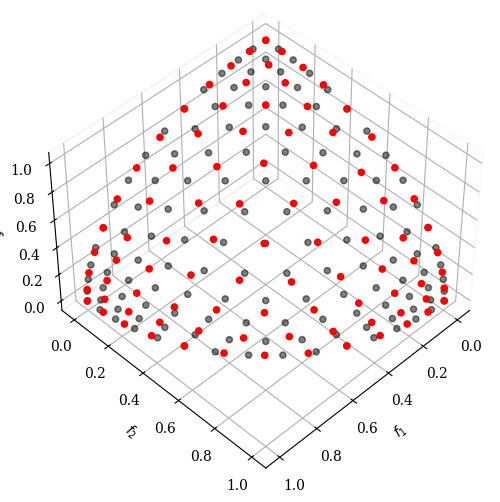

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj3,
                   algorithm,
                   ('n_gen', 100),
                   seed=1,
                   verbose=False)

    pf = problem_z2_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Four Objectives

In [ ]:
problem_z2_obj4 = get_problem('dtlz2', n_var=13, n_obj=4)

11.039391040802002


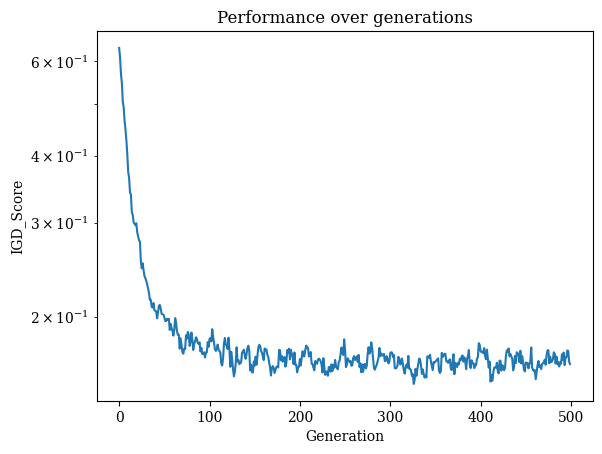

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,13)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj4,
                  algorithm,
                  ('n_gen', 500),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj4,500)

13.449310302734375


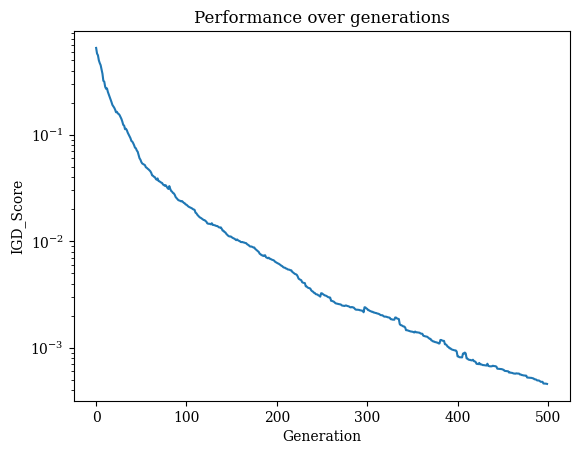

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,13)

ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z2_obj4,
                  algorithm,
                  ('n_gen', 500),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z2_obj4,500)

NSGA2 seems to converge after 100 generations whereas NSGA3 is still improving after 500. In the rest of the analysis we will consider the case of 500 generations.

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,13)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj4,
                   algorithm,
                   ('n_gen', 500),
                   seed=1,
                   verbose=False)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    pf = problem_z2_obj4.pareto_front(ref_dirs)
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

Median IGD: 0.1603
Max IGD: 0.17403
Min IGD: 0.15529
Hypervolume best solution: 0.47863
Hypervolume Pareto front: 0.55467


In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,13)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z2_obj4,
                   algorithm,
                   ('n_gen', 500),
                   seed=1,
                   verbose=False)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    pf = problem_z2_obj4.pareto_front(ref_dirs)
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

Median IGD: 0.00047
Max IGD: 0.00068
Min IGD: 0.00038
Hypervolume best solution: 0.54843
Hypervolume Pareto front: 0.54858


## Problem DTLZ3

### Two Objectives

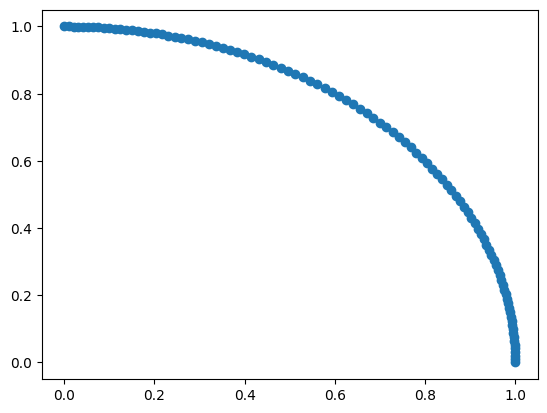

In [ ]:
problem_z3_obj2 = get_problem('dtlz3', n_var=11, n_obj=2)

p=problem_z3_obj2.pareto_front()
plt.scatter(p[:,0],p[:,1])
plt.show()

24.096247911453247


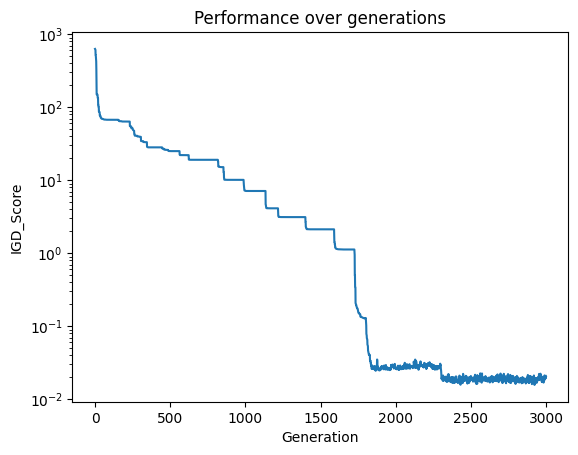

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(30,11)

algorithm = NSGA2(pop_size=30,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj2,
                  algorithm,
                  ('n_gen', 3000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj2,3000)

28.93983507156372


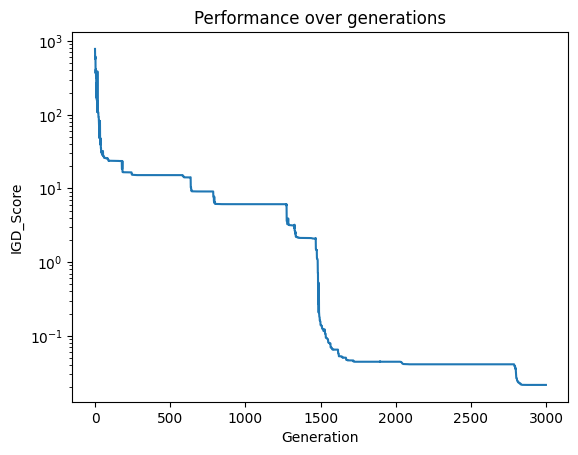

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(30,11)

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=20)
algorithm = NSGA3(pop_size=30,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj2,
                  algorithm,
                  ('n_gen', 3000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj2,3000)

From the above plots it seems that 3000 generations is the right value for convergence. This is what we will use below.

Median IGD: 0.0228
Max IGD: 1.02515
Min IGD: 0.01655
Hypervolume best solution: 0.19894
Hypervolume Pareto front: 0.21214


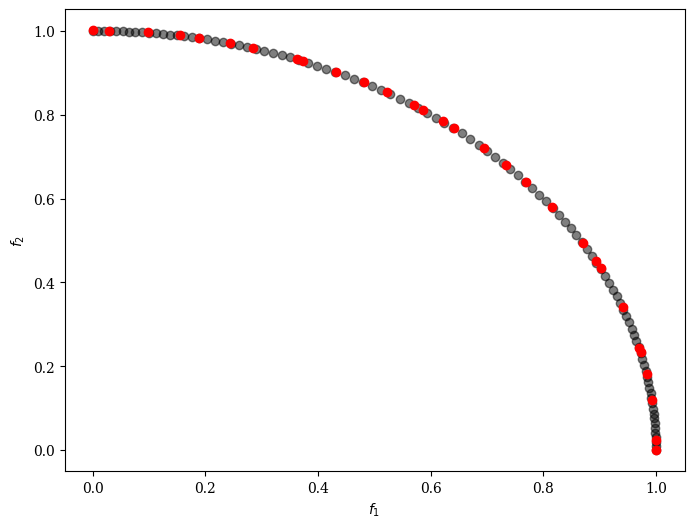

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(30,11)

    algorithm = NSGA2(pop_size=30,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj2,
                   algorithm,
                   ('n_gen', 3000),
                   seed=1,
                   verbose=False)

    pf = problem_z3_obj2.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.02278
Max IGD: 1.00595
Min IGD: 0.01979
Hypervolume best solution: 0.19407
Hypervolume Pareto front: 0.21466


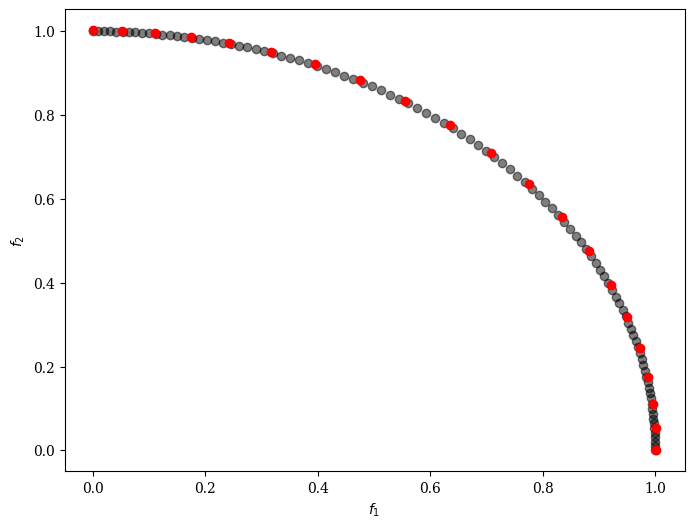

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(30,11)

    ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=20)
    algorithm = NSGA3(pop_size=30,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj2,
                   algorithm,
                   ('n_gen', 3000),
                   seed=1,
                   verbose=False)

    pf = problem_z3_obj2.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Three Objectives

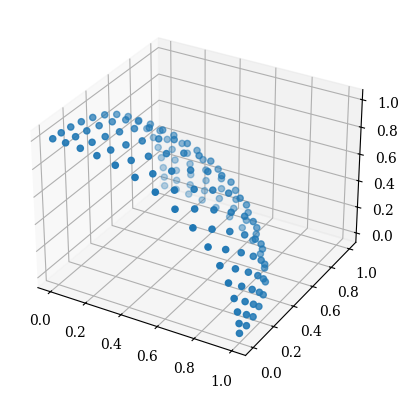

In [ ]:
problem_z3_obj3 = get_problem('dtlz3', n_var=12, n_obj=3)

p=problem_z3_obj3.pareto_front()

ax = plt.axes(projection='3d')
ax.scatter3D(p[:,0],p[:,1],p[:,2])
plt.show()

20.511249542236328


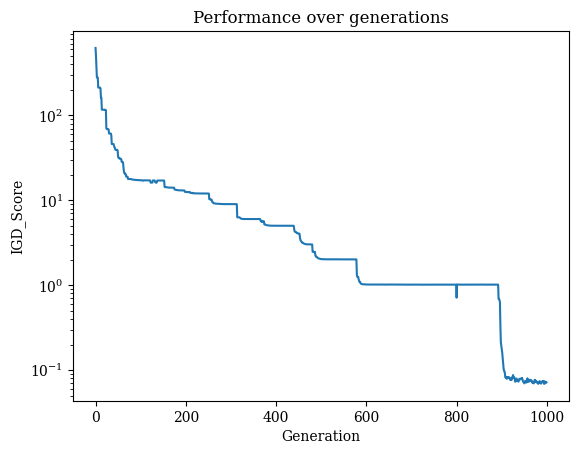

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,12)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj3,
                  algorithm,
                  ('n_gen', 1000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj3,1000)

24.27076506614685


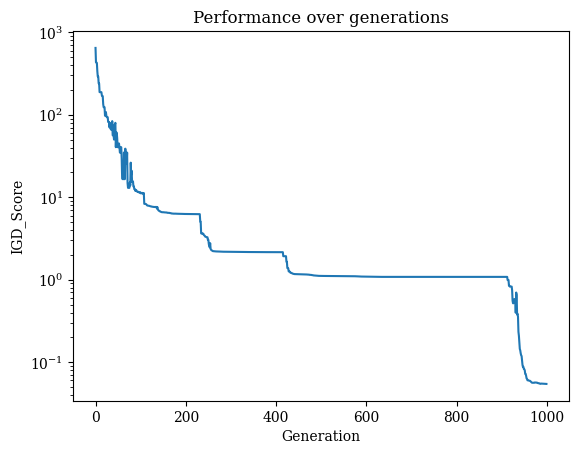

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,12)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj3,
                  algorithm,
                  ('n_gen', 1000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj3,1000)

From this analysis it seems 1000 generations is the correct value which we adopt in the following.

Median IGD: 0.07844
Max IGD: 2.01509
Min IGD: 0.07161
Hypervolume best solution: 0.39356
Hypervolume Pareto front: 0.43604


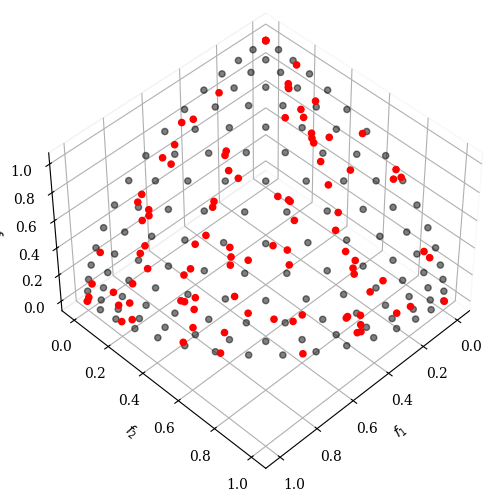

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj3,
                   algorithm,
                   ('n_gen', 1000),
                   seed=1,
                   verbose=False)

    pf = problem_z3_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.05158
Max IGD: 2.01038
Min IGD: 0.0512
Hypervolume best solution: 0.41393
Hypervolume Pareto front: 0.42613


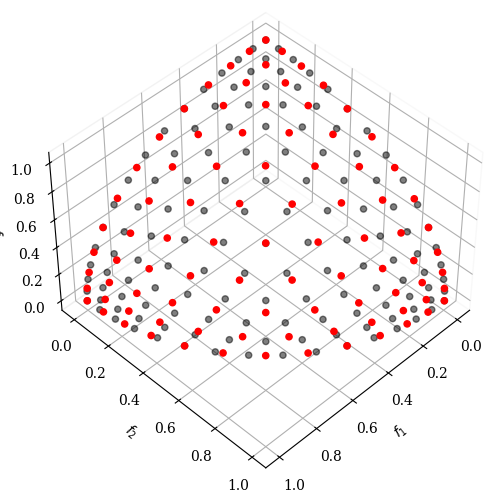

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj3,
                   algorithm,
                   ('n_gen', 1000),
                   seed=1,
                   verbose=False)

    pf = problem_z3_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Four Objectives

In [ ]:
problem_z3_obj4 = get_problem('dtlz3', n_var=13, n_obj=4)

40.275662660598755


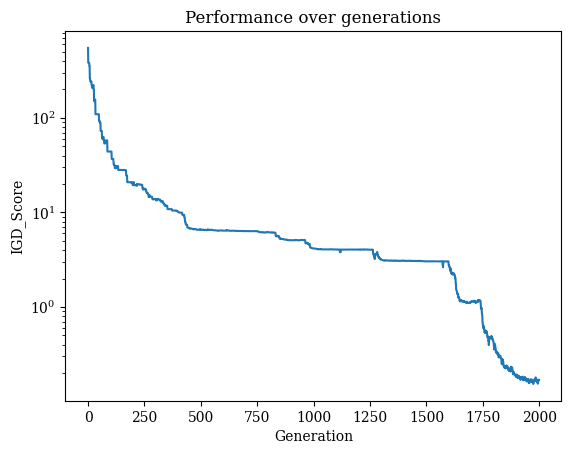

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,13)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj4,
                  algorithm,
                  ('n_gen', 2000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj4,2000)

50.66278839111328


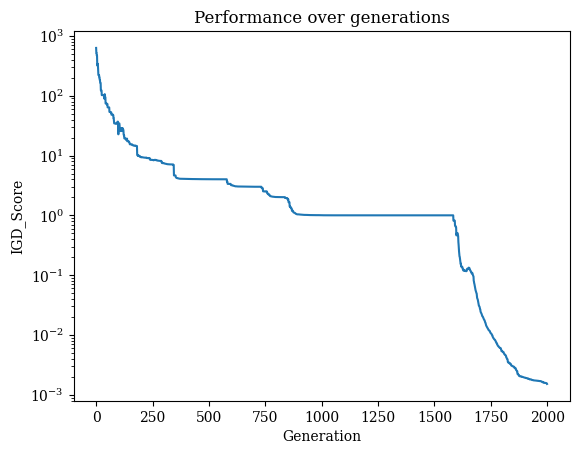

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,13)

ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z3_obj4,
                  algorithm,
                  ('n_gen', 2000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z3_obj4,2000)

2000 generations seems to be enough for convergence. We will use this value from now on.

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,13)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj4,
                   algorithm,
                   ('n_gen', 2000),
                   seed=1,
                   verbose=False)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    pf = problem_z3_obj4.pareto_front(ref_dirs)
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

Median IGD: 1.04668
Max IGD: 2.14757
Min IGD: 0.21317
Hypervolume best solution: 448683.96822
Hypervolume Pareto front: 448684.16435


In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,13)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z3_obj4,
                   algorithm,
                   ('n_gen', 2000),
                   seed=1,
                   verbose=False)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    pf = problem_z3_obj4.pareto_front(ref_dirs)
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

Median IGD: 0.05946
Max IGD: 2.00214
Min IGD: 0.00334
Hypervolume best solution: 0.55568
Hypervolume Pareto front: 0.56169


## Problem DTLZ6

The problem is not defined with two objectives, so we consider only the cases with 3 and 4 objectives.

### Three Objectives

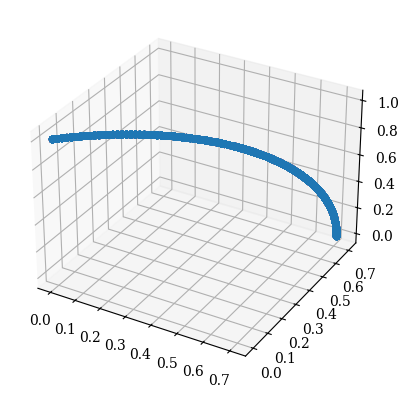

In [ ]:
problem_z6_obj3 = get_problem('dtlz6', n_var=12, n_obj=3)

p=problem_z6_obj3.pareto_front()

ax = plt.axes(projection='3d')
ax.scatter3D(p[:,0],p[:,1],p[:,2])
plt.show()

23.0782470703125


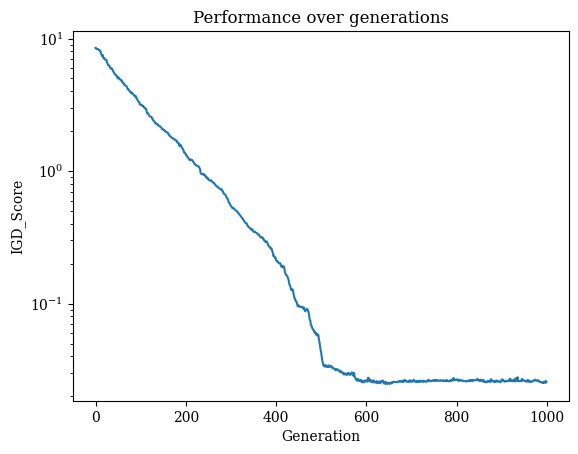

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,12)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z6_obj3,
                  algorithm,
                  ('n_gen', 1000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z6_obj3,1000)

25.61218571662903


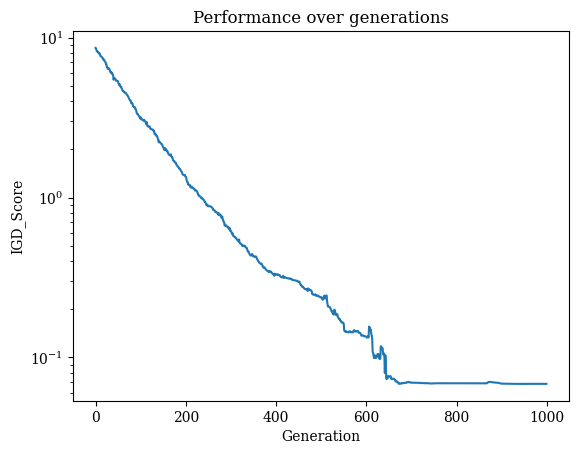

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,12)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z6_obj3,
                  algorithm,
                  ('n_gen', 1000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z6_obj3,1000)

From the above graphs it seems that 800 generations is enough. We will use this value from now on.

Median IGD: 0.10183
Max IGD: 0.1636
Min IGD: 0.06277
Hypervolume best solution: 0.1369
Hypervolume Pareto front: 0.19142


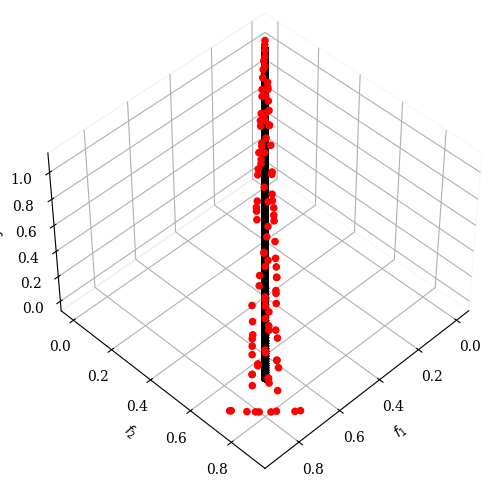

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z6_obj3,
                   algorithm,
                   ('n_gen', 800),
                   seed=1,
                   verbose=False)

    pf = problem_z6_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.11539
Max IGD: 0.1535
Min IGD: 0.06725
Hypervolume best solution: 0.39826
Hypervolume Pareto front: 0.52387


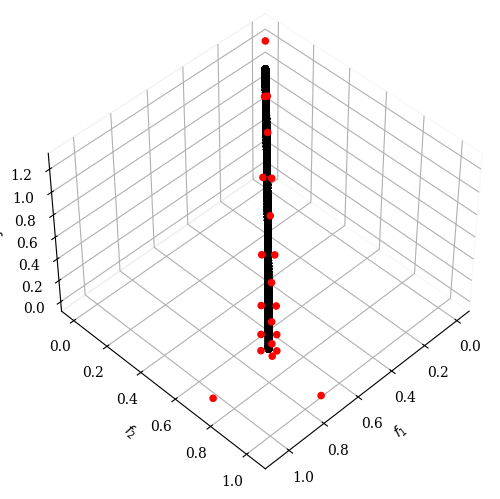

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,12)

    ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z6_obj3,
                   algorithm,
                   ('n_gen', 800),
                   seed=1,
                   verbose=False)

    pf = problem_z6_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Four Objectives

In [9]:
problem_z6_obj4 = get_problem('dtlz6', n_var=13, n_obj=4)

45.86974263191223


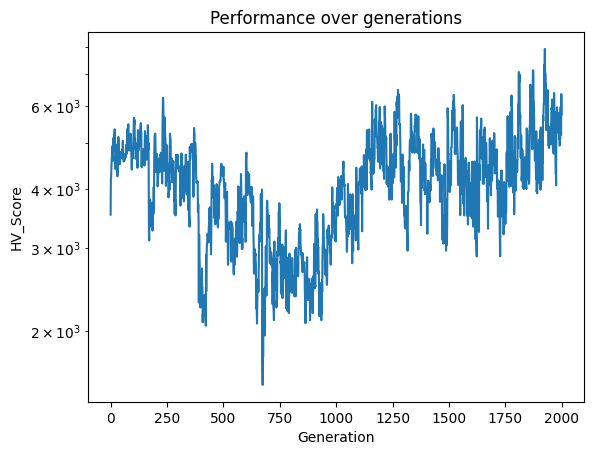

In [11]:
# Test NSGA2 to determine the correct number of generations. We use plot_hv since the Pareto front has not been implemented yet for 4 objectives.

Y=np.random.rand(100,13)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z6_obj4,
                  algorithm,
                  ('n_gen', 2000),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_hv(hist,problem_z6_obj4,2000)

37.29056644439697


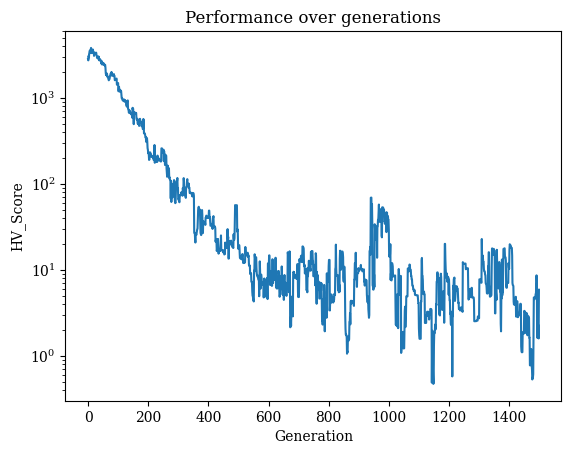

In [ ]:
# Test NSGA3 to determine the correct number of generations. We use plot_hv since the Pareto front has not been implemented yet for 4 objectives.

Y=np.random.rand(100,13)

ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z6_obj4,
                  algorithm,
                  ('n_gen', 1500),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_hv(hist,problem_z6_obj4,1500)

The Hypervolume converges much better for NSGA3. We proceed only for this algorithm then. We set the number of generations to 1500.

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max Hypervolume.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,13)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z6_obj4,
                   algorithm,
                   ('n_gen', 1500),
                   seed=1,
                   verbose=False)

    y=np.max(Res.F, axis=0)
    index=HV(ref_point=y)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about HV metric
print(f'Median Hypervolume: {round(np.median(metric),5)}')
print(f'Max Hypervolume: {round(np.max(metric),5)}')
print(f'Min Hypervolume: {round(np.min(metric),5)}')

Median Hypervolume: 9.08415
Max Hypervolume: 34.64039
Min Hypervolume: 0.64847


## Problem DTLZ7

### Three Objectives

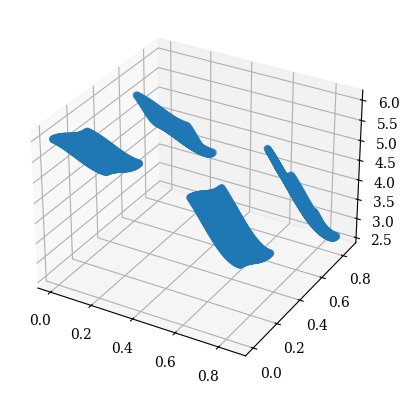

In [ ]:
problem_z7_obj3 = get_problem('dtlz7', n_var=22, n_obj=3)

p=problem_z7_obj3.pareto_front()

ax = plt.axes(projection='3d')
ax.scatter3D(p[:,0],p[:,1],p[:,2])
plt.show()

10.299352407455444


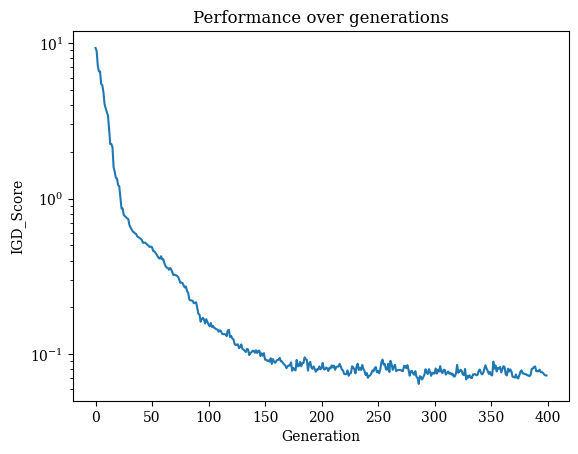

In [ ]:
# Test NSGA2 to determine the correct number of generations.

Y=np.random.rand(100,22)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z7_obj3,
                  algorithm,
                  ('n_gen', 400),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z7_obj3,400)

10.089827537536621


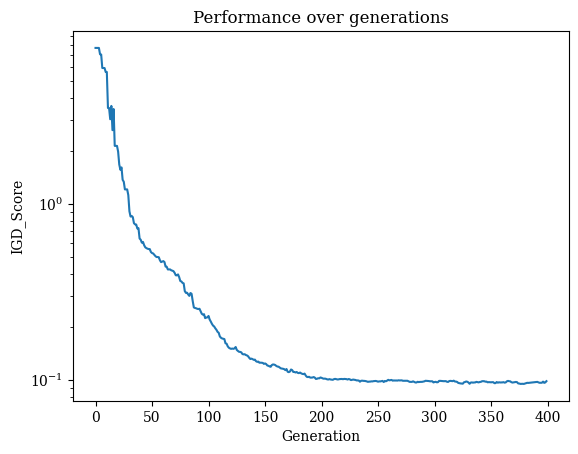

In [ ]:
# Test NSGA3 to determine the correct number of generations.

Y=np.random.rand(100,22)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z7_obj3,
                  algorithm,
                  ('n_gen', 400),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_igd(hist,problem_z7_obj3,400)

There is no significant improvement after 400 generations, so this is the value we will be using in the rest of the analysis.

Median IGD: 0.071
Max IGD: 0.076
Min IGD: 0.06791
Hypervolume best solution: 0.8573
Hypervolume Pareto front: 0.98315


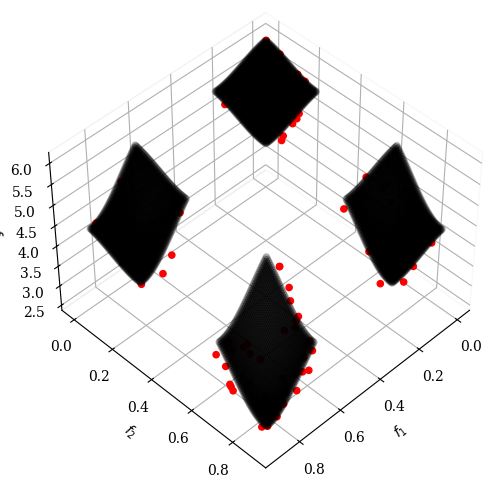

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,22)

    algorithm = NSGA2(pop_size=100,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z7_obj3,
                   algorithm,
                   ('n_gen', 400),
                   seed=1,
                   verbose=False)

    pf = problem_z7_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

Median IGD: 0.0969
Max IGD: 0.35901
Min IGD: 0.09425
Hypervolume best solution: 0.93267
Hypervolume Pareto front: 1.07048


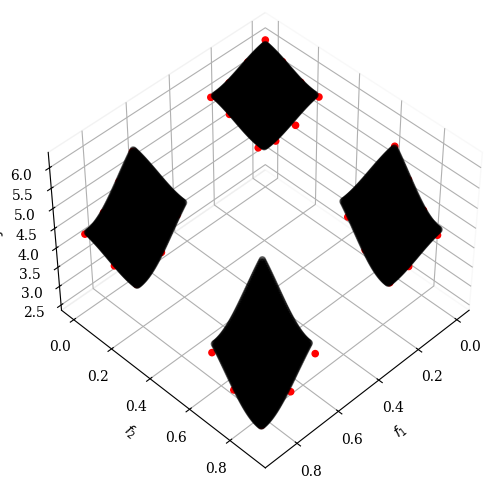

In [ ]:
#We perform 10 times NSGA3 and compute median, min and max IGD. We also compute the HyperVolume of the best found solution.
#We plot the Pareto front in black and the final generation in red.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,22)

    ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z7_obj3,
                   algorithm,
                   ('n_gen', 400),
                   seed=1,
                   verbose=False)

    pf = problem_z7_obj3.pareto_front()
    index= IGD(pf)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about IGD metric
print(f'Median IGD: {round(np.median(metric),5)}')
print(f'Max IGD: {round(np.max(metric),5)}')
print(f'Min IGD: {round(np.min(metric),5)}')

#We select the best solution and compare its HV metric with that of the known Pareto front.
res_opt=sols[np.argmin(metric)]
y=np.max(res_opt, axis=0)
ind=HV(ref_point=y)
print(f'Hypervolume best solution: {round(ind(res_opt),5)}')
print(f'Hypervolume Pareto front: {round(ind(pf),5)}')

#We plot the best solution and the Pareto front
plot = Scatter()
plot.add(pf, plot_type='scatter', color="black", alpha=0.5)
plot.add(res_opt, facecolor="red", edgecolor="red")
plot.show()

### Four Objectives

In [ ]:
problem_z7_obj4 = get_problem('dtlz7', n_var=23, n_obj=4)

12.121482133865356


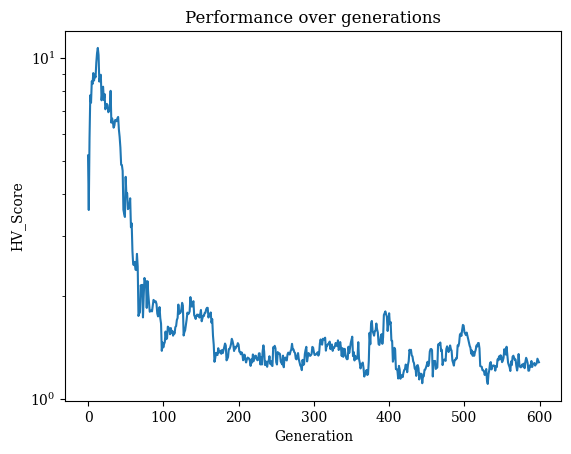

In [ ]:
# Test NSGA2 to determine the correct number of generations. We use plot_hv since the Pareto front has not been implemented yet for 4 objectives.

Y=np.random.rand(100,23)

algorithm = NSGA2(pop_size=100,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z7_obj4,
                  algorithm,
                  ('n_gen', 600),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_hv(hist,problem_z7_obj4,600)

14.117464542388916


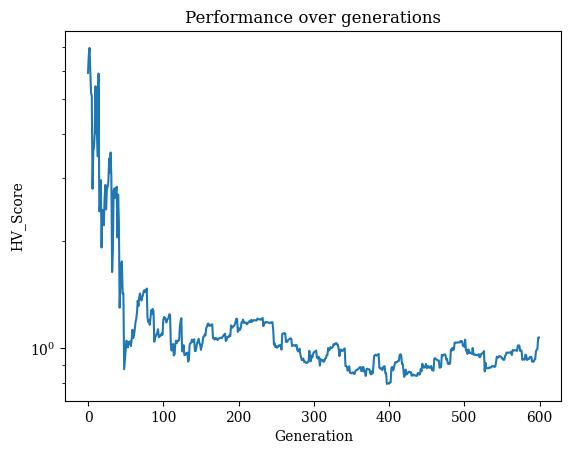

In [ ]:
# Test NSGA3 to determine the correct number of generations. We use plot_hv since the Pareto front has not been implemented yet for 4 objectives.

Y=np.random.rand(100,23)

ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
algorithm = NSGA3(pop_size=100,
                    ref_dirs=ref_dirs,
                    sampling=Y,
                    crossover=SBX(prob=1.0, eta=20),
                    mutation=PM(prob=0.2, eta=20),
                    eliminate_duplicates=True)

result = minimize(problem_z7_obj4,
                  algorithm,
                  ('n_gen', 600),
                  seed=1,
                  save_history=True,
                  verbose=False)

hist=result.history
print(result.exec_time)
plot_hv(hist,problem_z7_obj4,600)

We will use 400 generations in the rest of the analysis. For this problem the HV score of NSGA2 is well behaved and therefore we proceed with the analysis for both algorithms.

In [ ]:
#We perform 10 times NSGA2 and compute median, min and max Hypervolume.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,23)

    algorithm = NSGA2(pop_size=100,
                      sampling=Y,
                      crossover=SBX(prob=1.0, eta=20),
                      mutation=PM(prob=0.2, eta=20),
                      eliminate_duplicates=True)

    Res = minimize(problem_z7_obj4,
                   algorithm,
                   ('n_gen', 400),
                   seed=1,
                   verbose=False)

    y=np.max(Res.F, axis=0)
    index=HV(ref_point=y)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about HV metric
print(f'Median Hypervolume: {round(np.median(metric),5)}')
print(f'Max Hypervolume: {round(np.max(metric),5)}')
print(f'Min Hypervolume: {round(np.min(metric),5)}')

Median Hypervolume: 1.26855
Max Hypervolume: 1.47005
Min Hypervolume: 1.12044


In [ ]:
#We perform 10 times NSGA3 and compute median, min and max Hypervolume.

metric=[]
sols=[]

for i in range(10):
    Y=np.random.rand(100,23)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=6)
    algorithm = NSGA3(pop_size=100,
                        ref_dirs=ref_dirs,
                        sampling=Y,
                        crossover=SBX(prob=1.0, eta=20),
                        mutation=PM(prob=0.2, eta=20),
                        eliminate_duplicates=True)

    Res = minimize(problem_z7_obj4,
                   algorithm,
                   ('n_gen', 400),
                   seed=1,
                   verbose=False)

    y=np.max(Res.F, axis=0)
    index=HV(ref_point=y)
    metric.append(index(Res.F))
    sols.append(Res.F)

# Statistics about HV metric
print(f'Median Hypervolume: {round(np.median(metric),5)}')
print(f'Max Hypervolume: {round(np.max(metric),5)}')
print(f'Min Hypervolume: {round(np.min(metric),5)}')

Median Hypervolume: 0.94228
Max Hypervolume: 1.14404
Min Hypervolume: 0.84756
